# Titanic

### Importing Pandas, Numpy, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading tsv file with seperator parameter

In [2]:
titanic_df = pd.read_csv("C:/Users/emir1/OneDrive/Masaüstü/Files/DataMining/Project/Titanic.tsv", sep="\t")

### Viewing the dataset at first 

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  894 non-null    int64  
 1   Survived     894 non-null    int64  
 2   Pclass       894 non-null    float64
 3   Name         894 non-null    object 
 4   Sex          894 non-null    object 
 5   Age          721 non-null    object 
 6   SibSp        894 non-null    int64  
 7   Parch        894 non-null    object 
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        208 non-null    object 
 11  Embarked     892 non-null    object 
 12  ship         894 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 90.9+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,SibSp
count,894.000000,894.000000,894.000000,894.000000
mean,446.030201,0.381432,2.305369,0.604027
std,259.208003,0.508529,0.847653,2.571231
min,-12.000000,-4.000000,-2.000000,0.000000
25%,223.250000,0.000000,2.000000,0.000000
50%,444.500000,0.000000,3.000000,0.000000
75%,668.750000,1.000000,3.000000,1.000000
max,1143.000000,1.000000,3.000000,70.000000


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic


### I saw some NaN values in the Cabin column so I wanted to see more about it

In [6]:
titanic_df['Cabin'].value_counts()

G6             7
C93            5
C23 C25 C27    4
B96 B98        4
F2             3
              ..
C32            1
E34            1
C7             1
C54            1
C148           1
Name: Cabin, Length: 145, dtype: int64

In [7]:
titanic_df['Cabin'].isnull().sum()

686

### I have checked the other columns, too.

In [8]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket          True
Fare            True
Cabin           True
Embarked        True
ship           False
dtype: bool

In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           1
Fare             1
Cabin          686
Embarked         2
ship             0
dtype: int64

### Checked for the Age column

In [10]:
titanic_df['Age'].value_counts()

24      30
22      27
18      26
19      25
28      24
        ..
12       1
70,5     1
66       1
.9       1
.7       1
Name: Age, Length: 94, dtype: int64

In [11]:
titanic_df['Age'].count()

721

### Dropping section 

In [12]:
titanic_df.drop('Cabin', inplace=True, axis=1)

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",S,Titanic


### Input few missing values

##### Filling Age with most frequent value

In [14]:
titanic_df['Age'] = titanic_df['Age'].fillna(24)

In [15]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         1
Fare           1
Embarked       2
ship           0
dtype: int64

##### Filling the others

In [16]:
titanic_df['Ticket'].value_counts()

1601        7
CA. 2343    7
3101295     6
347082      6
347088      6
           ..
226593      1
9234        1
19988       1
2693        1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [17]:
titanic_df['Ticket'] = titanic_df['Ticket'].fillna('No info')

In [18]:
titanic_df['Fare'].value_counts()

8,05       43
13         42
7,8958     38
7,75       34
26         31
           ..
15,9        1
28,5        1
6,2375      1
14          1
10,5167     1
Name: Fare, Length: 251, dtype: int64

In [19]:
titanic_df['Fare'] = titanic_df['Fare'].fillna(8)

In [20]:
titanic_df['Embarked'].value_counts()

S     645
C     167
Q      76
So      2
Co      1
Qe      1
Name: Embarked, dtype: int64

In [21]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('No info')

### Checking for the duplicates

In [22]:
titanic_df.duplicated().value_counts()

False    891
True       3
dtype: int64

In [23]:
titanic_df.drop_duplicates(inplace=True)

In [24]:
titanic_df.duplicated().value_counts()

False    891
dtype: int64

### Fixing Wrong values in Embarked

In [25]:
titanic_df['Embarked'].value_counts()

S          642
C          167
Q           76
So           2
No info      2
Co           1
Qe           1
Name: Embarked, dtype: int64

In [26]:
titanic_df['Embarked'] = titanic_df['Embarked'].replace(['So', 'Co', 'Qe'], ['S', 'C', 'Q'])

In [27]:
titanic_df['Embarked'].value_counts()

S          644
C          168
Q           77
No info      2
Name: Embarked, dtype: int64

### Changing Name to FirstName and LastName

In [28]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",S,Titanic


In [29]:
titanic_df['LastName'] = titanic_df['Name'].str.split(',').str[0]
titanic_df['FirstName'] = titanic_df['Name'].str.split(',').str[1]

In [30]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",S,Titanic,Braund,Mr. Owen Harris
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C,Titanic,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",S,Titanic,Heikkinen,Miss. Laina
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",S,Titanic,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",S,Titanic,Allen,Mr. William Henry


In [31]:
titanic_df.drop('Name', inplace=True, axis=1)

In [32]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
0,1,0,3.0,male,22,1,0,A/5 21171,"7,25",S,Titanic,Braund,Mr. Owen Harris
1,2,1,1.0,female,38,1,0,PC 17599,"71,2833",C,Titanic,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3.0,female,26,0,0,STON/O2. 3101282,"7,925",S,Titanic,Heikkinen,Miss. Laina
3,4,1,1.0,female,35,1,0,113803,"53,1",S,Titanic,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3.0,male,35,0,0,373450,"8,05",S,Titanic,Allen,Mr. William Henry


### Checking for unique values

In [33]:
titanic_df['Survived'].unique()

array([ 0,  1, -4], dtype=int64)

In [34]:
titanic_df['Survived'].value_counts()

 0    548
 1    342
-4      1
Name: Survived, dtype: int64

In [35]:
titanic_df['Survived'] = titanic_df['Survived'].replace(-4, 0)

In [36]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
titanic_df['Pclass'].unique()

array([ 3.,  1.,  2., -2.])

In [38]:
titanic_df['Pclass'].value_counts()

 3.0    491
 1.0    215
 2.0    184
-2.0      1
Name: Pclass, dtype: int64

In [39]:
titanic_df['Pclass'] = titanic_df['Pclass'].replace(-2.0, 2.0)

In [40]:
titanic_df['Pclass'].unique()

array([3., 1., 2.])

In [41]:
titanic_df['Sex'].unique()

array(['male', 'female', 'malef', 'mal', 'fem', 'femmale', 'feemale',
       'Female', 'malee', 'F'], dtype=object)

In [42]:
titanic_df['Sex'].value_counts()

male       574
female     308
fem          2
malef        1
mal          1
femmale      1
feemale      1
Female       1
malee        1
F            1
Name: Sex, dtype: int64

In [43]:
titanic_df['Sex'] = titanic_df['Sex'].replace(['malef', 'mal', 'fem', 'femmale', 'feemale', 'Female', 'malee', 'F'], ['male', 'male', 'female', 'female', 'female', 'female', 'male', 'female'])

In [44]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
titanic_df['SibSp'].value_counts()

0     606
1     210
2      28
4      18
3      16
8       7
5       5
70      1
Name: SibSp, dtype: int64

In [46]:
titanic_df['SibSp'] = titanic_df['SibSp'].replace(70, 7)

In [47]:
titanic_df['SibSp'].value_counts()

0    606
1    210
2     28
4     18
3     16
8      7
5      5
7      1
Name: SibSp, dtype: int64

In [48]:
titanic_df['Parch'].value_counts()

0     678
1     119
2      80
3       5
5       4
4       4
no      1
Name: Parch, dtype: int64

In [49]:
titanic_df['Parch'] = titanic_df['Parch'].replace('no', 0)

In [50]:
titanic_df['Parch'].value_counts()

0    678
1    119
2     80
3      5
5      4
4      4
0      1
Name: Parch, dtype: int64

### Outliers detection

In [51]:
titanic_df.describe()

,PassengerId,Survived,Pclass,SibSp
count,891.000000,891.000000,891.000000,891.000000
mean,447.254770,0.383838,2.309764,0.531987
std,258.715268,0.486592,0.834983,1.123717
min,-12.000000,0.000000,1.000000,0.000000
25%,224.500000,0.000000,2.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000
75%,669.500000,1.000000,3.000000,1.000000
max,1143.000000,1.000000,3.000000,8.000000


### Trying to find outlier in Fare column

In [52]:
titanic_df['Fare'] = titanic_df['Fare'].str.replace(',', '.')

In [53]:
titanic_df['Fare'].unique()

array(['7.25', '71.2833', '7.925', '53.1', '8.05', '8.4583', '51.8625',
       '21.075', '11.1333', '30.0708', '16.7', '26.55', '7.8542', '16',
       '29.125', '13', '18', '7.225', '26', '8.0292', '31.3875', '263',
       '7.8792', '7.8958', '27.7208', '146.5208', '7.75', '10.5',
       '82.1708', '52', '7.2292', '11.2417', '9.475', '21', '41.5792',
       '15.5', '21.6792', '17.8', '39.6875', '7.8', '76.7292', '61.9792',
       '35.5', '27.75', '46.9', '80', '83.475', '27.9', '15.2458',
       '8.1583', '8.6625', '73.5', '14.4542', '56.4958', '7.65', '29',
       '12.475', '9', '9.5', '7.7875', '47.1', '15.85', '34.375',
       '61.175', '20.575', '34.6542', '63.3583', '23', '77.2875',
       '8.6542', '7.775', '24.15', '9.825', '14.4583', '247.5208',
       '31.275', '7.1417', '22.3583', '6.975', '7.05', '14.5', '15.0458',
       '26.2833', '9.2167', '79.2', '6.75', '11.5', '36.75', '7.7958',
       '12.525', '66.6', '7.3125', '61.3792', '7.7333', '69.55', '16.1',
       '15.75', '2

In [54]:
titanic_df['Fare'] = titanic_df['Fare'].replace(['07.maj', '-90', 'nan'], ['7', '90', '0'])

In [55]:
titanic_df['Fare'] = titanic_df['Fare'].astype(np.float64)

In [56]:
titanic_df['Fare'].describe()

count    890.000000
mean      32.219526
std       49.758296
min        0.000000
25%        7.895800
50%       14.454200
75%       30.923950
max      512.329200
Name: Fare, dtype: float64

##### Examination of Fare column

In [57]:
%matplotlib inline

<AxesSubplot: >

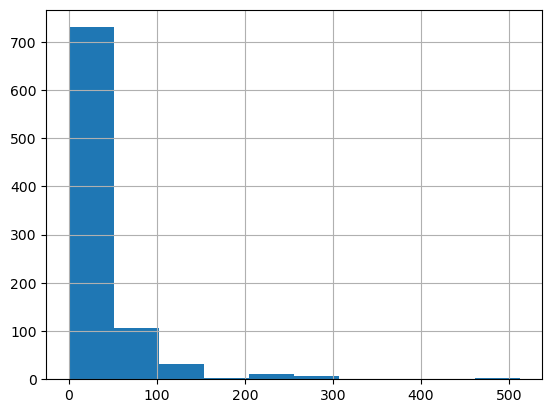

In [58]:
titanic_df['Fare'].hist()

In [59]:
titanic_df[titanic_df.Fare > 100]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
27,28,0,1.0,male,19,3,2,19950,263.0000,S,Titanic,Fortune,Mr. Charles Alexander
31,32,1,1.0,female,.9,1,0,PC 17569,146.5208,C,Titanic,Spencer,Mrs. William Augustus (Marie Eugenie)
88,89,1,1.0,female,23,3,2,19950,263.0000,S,Titanic,Fortune,Miss. Mabel Helen
118,119,0,1.0,male,24,0,1,PC 17558,247.5208,C,Titanic,Baxter,Mr. Quigg Edmond
195,196,1,1.0,female,58,0,0,PC 17569,146.5208,C,Titanic,Lurette,Miss. Elise
215,216,1,1.0,female,31,1,0,35273,113.2750,C,Titanic,Newell,Miss. Madeleine
258,259,1,1.0,female,35,0,0,PC 17755,512.3292,C,Titanic,Ward,Miss. Anna
268,269,1,1.0,female,58,0,1,PC 17582,153.4625,S,Titanic,Graham,Mrs. William Thompson (Edith Junkins)
269,270,1,1.0,female,35,0,0,PC 17760,135.6333,S,Titanic,Bissette,Miss. Amelia
297,298,0,1.0,female,2,1,2,113781,151.5500,S,Titanic,Allison,Miss. Helen Loraine


In [60]:
#titanic_df.drop(512.3292, axis=0, inplace=True)
# I have done this and reload the kernel so it will give error in next tries so commented out 

In [61]:
titanic_df[titanic_df.Fare > 200]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
27,28,0,1.0,male,19,3,2,19950,263.0000,S,Titanic,Fortune,Mr. Charles Alexander
88,89,1,1.0,female,23,3,2,19950,263.0000,S,Titanic,Fortune,Miss. Mabel Helen
118,119,0,1.0,male,24,0,1,PC 17558,247.5208,C,Titanic,Baxter,Mr. Quigg Edmond
258,259,1,1.0,female,35,0,0,PC 17755,512.3292,C,Titanic,Ward,Miss. Anna
299,300,1,1.0,female,50,0,1,PC 17558,247.5208,C,Titanic,Baxter,Mrs. James (Helene DeLaudeniere Chaput)
311,312,1,1.0,female,18,2,2,PC 17608,262.3750,C,Titanic,Ryerson,Miss. Emily Borie
341,342,1,1.0,female,24,3,2,19950,263.0000,S,Titanic,Fortune,Miss. Alice Elizabeth
377,378,0,1.0,male,27,0,2,113503,211.5000,C,Titanic,Widener,Mr. Harry Elkins
380,381,1,1.0,female,42,0,0,PC 17757,227.5250,C,Titanic,Bidois,Miss. Rosalie
438,439,0,1.0,male,64,1,4,19950,263.0000,S,Titanic,Fortune,Mr. Mark


##### Found a problem in PassengerId and fixed it 

In [62]:
titanic_df['PassengerId'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   15,   16,   17,   18,   19,   20,   21,   22,   23,
         25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
         47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
         58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,
         69,   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  1

In [63]:
titanic_df['PassengerId'] = titanic_df['PassengerId'].replace(-12, 12)

In [64]:
titanic_df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
15.9000     1
28.5000     1
6.2375      1
10.5167     1
Name: Fare, Length: 249, dtype: int64

### Final looks at the dataset

##### Fixing Name Problems

In [65]:
titanic_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
0,1,0,3.0,male,22,1,0,A/5 21171,7.2500,S,Titanic,Braund,Mr. Owen Harris
1,2,1,1.0,female,38,1,0,PC 17599,71.2833,C,Titanic,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3.0,female,26,0,0,STON/O2. 3101282,7.9250,S,Titanic,Heikkinen,Miss. Laina
3,4,1,1.0,female,35,1,0,113803,53.1000,S,Titanic,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3.0,male,35,0,0,373450,8.0500,S,Titanic,Allen,Mr. William Henry
5,6,0,3.0,male,24,0,0,330877,8.4583,Q,Titanic,Moran,Mr. James
6,7,0,1.0,male,54,0,0,17463,51.8625,S,Titanic,McCarthy,Mr. Timothy J
7,8,0,3.0,male,2,3,1,349909,21.0750,S,Titanic,Palsson,Master. Gosta Leonard
8,9,1,3.0,female,27,0,2,347742,11.1333,S,Titanic,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2.0,female,14,1,0,237736,30.0708,C,Titanic,Nasser,Mrs. Nicholas (Adele Achem)


In [66]:
titanic_df['FirstName'].unique()

array([' Mr. Owen Harris', ' Mrs. John Bradley (Florence Briggs Thayer)',
       ' Miss. Laina', ' Mrs. Jacques Heath (Lily May Peel)',
       ' Mr. William Henry', ' Mr. James', ' Mr. Timothy J',
       ' Master. Gosta Leonard',
       ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       ' Mrs. Nicholas (Adele Achem)', ' Miss. Marguerite Ru&5$$',
       ' Miss. Elizabeth', ' Miss. Hulda Amanda Adolfina',
       ' Mrs. (Mary D Kingcome)', ' Master. Eugene',
       ' Mr. Charles Eugene', ' Mrs. Julius (Emelia Maria Vandemoortele)',
       ' Mrs. Fatima', ' Mr. Joseph J', ' Mr. Lawrence',
       ' Miss. Anna "Annie"', ' Miss. Torborg Danira',
       ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       ' Mr. Farred Chehab', ' Mr. Charles Alexander',
       ' Miss. Ellen "Nellie"', ' Mr. Lalio', ' Don. Manuel E',
       ' Mrs. William Augustus (Marie Eugenie)', ' Miss. Mary Agatha',
       ' Mr. Edward H', ' Mr. Edgar Joseph', ' Mr. Alexander Oskar',
       ' Mr. Hanna', ' Mr. Ernest

In [67]:
titanic_df['FirstName'] = titanic_df['FirstName'].replace(' Miss. Marguerite Ru&5$$', ' Miss. Marguerite')

In [68]:
titanic_df['FirstName'].unique()

array([' Mr. Owen Harris', ' Mrs. John Bradley (Florence Briggs Thayer)',
       ' Miss. Laina', ' Mrs. Jacques Heath (Lily May Peel)',
       ' Mr. William Henry', ' Mr. James', ' Mr. Timothy J',
       ' Master. Gosta Leonard',
       ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       ' Mrs. Nicholas (Adele Achem)', ' Miss. Marguerite',
       ' Miss. Elizabeth', ' Miss. Hulda Amanda Adolfina',
       ' Mrs. (Mary D Kingcome)', ' Master. Eugene',
       ' Mr. Charles Eugene', ' Mrs. Julius (Emelia Maria Vandemoortele)',
       ' Mrs. Fatima', ' Mr. Joseph J', ' Mr. Lawrence',
       ' Miss. Anna "Annie"', ' Miss. Torborg Danira',
       ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       ' Mr. Farred Chehab', ' Mr. Charles Alexander',
       ' Miss. Ellen "Nellie"', ' Mr. Lalio', ' Don. Manuel E',
       ' Mrs. William Augustus (Marie Eugenie)', ' Miss. Mary Agatha',
       ' Mr. Edward H', ' Mr. Edgar Joseph', ' Mr. Alexander Oskar',
       ' Mr. Hanna', ' Mr. Ernest Charle

In [69]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
889,890,1,1.0,male,26,0,0,111369,30.0000,C,Titanic,Behr,Mr. Karl Howell
890,891,0,3.0,male,32,0,0,370376,7.7500,Q,Titanic,Dooley,Mr. Patrick
891,1000,1,1.0,male,38,1,0,19943,90.0000,S,Titanic,Mr. Frederick Maxfield Hoyt,NaN
892,1143,1,3.0,female,4,1,1,PP 9549,16.7000,S,Titanic,Sandstrom,Miss. Marguerite
893,12,0,3.0,female,.7,0,0,350406,7.8542,S,Titanic,Vestrom,Miss. Hulda Amanda Adolfina


In [70]:
titanic_df['FirstName'] = titanic_df['FirstName'].replace(np.nan, ' Mr.Frederick Maxfield')

In [71]:
titanic_df['LastName'].unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Vestrom', 'Hewlett', 'Rice', 'Williams',
       'Vander Planke', 'Masselmani', 'Fynney', 'Beesley', 'McGowan',
       'Asplund', 'Emir', 'Fortune', "O'Dwyer", 'Todoroff', 'Uruchurtu',
       'Spencer', 'Glynn', 'Wheadon', 'Meyer', 'Holverson', 'Mamee',
       'Cann', 'Nicola-Yarred', 'Ahlin', 'Turpin', 'Kraeff', 'Laroche',
       'Devaney', 'Rogers', 'Lennon', "O'Driscoll", 'Samaan',
       'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper', 'Faunthorpe',
       'Ostby', 'Woolner', 'Rugg', 'Novel', 'West', 'Goodwin',
       'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart', 'Moubarek',
       'Nye', 'Crease', 'Andersson', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom', 'Ford',

In [72]:
titanic_df['LastName'] = titanic_df['LastName'].replace('Mr. Frederick Maxfield Hoyt', 'Hoyt')

In [73]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName
889,890,1,1.0,male,26,0,0,111369,30.0000,C,Titanic,Behr,Mr. Karl Howell
890,891,0,3.0,male,32,0,0,370376,7.7500,Q,Titanic,Dooley,Mr. Patrick
891,1000,1,1.0,male,38,1,0,19943,90.0000,S,Titanic,Hoyt,Mr.Frederick Maxfield
892,1143,1,3.0,female,4,1,1,PP 9549,16.7000,S,Titanic,Sandstrom,Miss. Marguerite
893,12,0,3.0,female,.7,0,0,350406,7.8542,S,Titanic,Vestrom,Miss. Hulda Amanda Adolfina


##### Looking at the ship column

In [74]:
titanic_df['ship'].value_counts()

Titanic    889
Titani       1
Titnic       1
Name: ship, dtype: int64

In [75]:
titanic_df['ship'] = titanic_df['ship'].replace(['Titani', 'Titnic'], 'Titanic')

In [76]:
titanic_df['ship'].value_counts()

Titanic    891
Name: ship, dtype: int64

##### Checking PassengerId column and Fixing duplication

In [77]:
titanic_df['PassengerId'].duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
889    False
890    False
891    False
892    False
893     True
Name: PassengerId, Length: 891, dtype: bool

In [78]:
titanic_df['PassengerId'].describe()

count     891.000000
mean      447.281706
std       258.668645
min         1.000000
25%       224.500000
50%       446.000000
75%       669.500000
max      1143.000000
Name: PassengerId, dtype: float64

In [79]:
titanic_df['Age'].describe()

count     891
unique     95
top        24
freq      173
Name: Age, dtype: int64

In [80]:
titanic_df.loc[(titanic_df['PassengerId'] == 12) & (titanic_df['Age'] == '.7'), 'PassengerId'] = 894

### Finally I will check for the name titles

In [81]:
titanic_df['Titles'] = titanic_df['FirstName'].str.split('.').str[0]

In [82]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName,Titles
0,1,0,3.0,male,22,1,0,A/5 21171,7.2500,S,Titanic,Braund,Mr. Owen Harris,Mr
1,2,1,1.0,female,38,1,0,PC 17599,71.2833,C,Titanic,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3.0,female,26,0,0,STON/O2. 3101282,7.9250,S,Titanic,Heikkinen,Miss. Laina,Miss
3,4,1,1.0,female,35,1,0,113803,53.1000,S,Titanic,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3.0,male,35,0,0,373450,8.0500,S,Titanic,Allen,Mr. William Henry,Mr


In [83]:
titanic_df['FirstName'] = titanic_df['FirstName'].str.split('.').str[1]

In [84]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName,Titles
0,1,0,3.0,male,22,1,0,A/5 21171,7.2500,S,Titanic,Braund,Owen Harris,Mr
1,2,1,1.0,female,38,1,0,PC 17599,71.2833,C,Titanic,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3.0,female,26,0,0,STON/O2. 3101282,7.9250,S,Titanic,Heikkinen,Laina,Miss
3,4,1,1.0,female,35,1,0,113803,53.1000,S,Titanic,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3.0,male,35,0,0,373450,8.0500,S,Titanic,Allen,William Henry,Mr


In [85]:
titanic_df['Titles'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [86]:
titanic_df['Titles'] = titanic_df['Titles'].replace([' Capt', ' Col', ' Major', ' Dr', ' Rev'], 'Officer')

In [87]:
titanic_df['Titles'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', 'Officer', ' Mme',
       ' Ms', ' Lady', ' Sir', ' Mlle', ' the Countess', ' Jonkheer'],
      dtype=object)

In [88]:
titanic_df['Titles'] = titanic_df['Titles'].replace([' Jonkheer', ' Don', ' Sir', ' the Countess', ' Dona', ' Lady'], 'Royal')

In [89]:
titanic_df['Titles'] = titanic_df['Titles'].replace([' Mme', ' Ms', ' Mrs'], 'Mrs')

In [90]:
titanic_df['Titles'] = titanic_df['Titles'].replace([' Mlle', ' Miss'], 'Miss')

In [91]:
titanic_df['Titles'] = titanic_df['Titles'].replace([' Mr', ' Master'], 'Mr')

In [92]:
titanic_df['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Royal', 'Officer'], dtype=object)

In [93]:
titanic_df['Titles'] = titanic_df['Titles'].fillna('No Title')

In [95]:
titanic_df['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Royal', 'Officer'], dtype=object)

In [96]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,LastName,FirstName,Titles
0,1,0,3.0,male,22,1,0,A/5 21171,7.2500,S,Titanic,Braund,Owen Harris,Mr
1,2,1,1.0,female,38,1,0,PC 17599,71.2833,C,Titanic,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3.0,female,26,0,0,STON/O2. 3101282,7.9250,S,Titanic,Heikkinen,Laina,Miss
3,4,1,1.0,female,35,1,0,113803,53.1000,S,Titanic,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3.0,male,35,0,0,373450,8.0500,S,Titanic,Allen,William Henry,Mr
5,6,0,3.0,male,24,0,0,330877,8.4583,Q,Titanic,Moran,James,Mr
6,7,0,1.0,male,54,0,0,17463,51.8625,S,Titanic,McCarthy,Timothy J,Mr
7,8,0,3.0,male,2,3,1,349909,21.0750,S,Titanic,Palsson,Gosta Leonard,Mr
8,9,1,3.0,female,27,0,2,347742,11.1333,S,Titanic,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,1,2.0,female,14,1,0,237736,30.0708,C,Titanic,Nasser,Nicholas (Adele Achem),Mrs
